In [1]:
"""
Python 3.10 Best models Spaceship_Titanic program will you survive on the spaceship titanic or not
File name Titanic_eda.py

Version: 0.1
Author: MLCV
Date: 2023-06-25
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]
pandas version: 1.4.3
matplotlib version: 3.6.3
NumPy version: 1.23.0
SciPy version: 1.10.0
IPython version: 8.9.0
scikit-learn version: 1.2.1
-------------------------


In [95]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')

data1 = data_raw.copy(deep = True)

data_cleaner = [data1, data_val]

print(data_raw.info())

data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7825,8348_01,Mars,True,E/532/P,TRAPPIST-1e,47.0,False,0.0,NaN,0.0,0.0,0.0,Minies Hotty,True
4249,4517_01,Earth,False,F/849/S,TRAPPIST-1e,37.0,False,452.0,0.0,234.0,19.0,1290.0,Bara Mcleandez,False
1862,1984_01,Europa,False,NaN,55 Cancri e,37.0,False,0.0,3166.0,0.0,91.0,6.0,Mesath Wassid,True
7246,7748_01,Europa,False,A/94/S,TRAPPIST-1e,44.0,False,18.0,1451.0,0.0,279.0,64.0,Alamin Obsentork,False
2866,3096_01,Mars,False,D/103/S,55 Cancri e,25.0,False,5.0,1.0,633.0,0.0,188.0,Seat Khaf,True
6309,6672_02,Mars,False,F/1387/P,55 Cancri e,4.0,False,0.0,0.0,0.0,0.0,0.0,Panbug Deva,True
4559,4850_02,Earth,False,G/792/S,TRAPPIST-1e,55.0,False,330.0,114.0,0.0,2.0,0.0,Billya Shieldson,True
4864,5188_03,Earth,True,G/838/P,TRAPPIST-1e,12.0,False,0.0,0.0,0.0,0.0,0.0,Wally Bootez,False
8574,9157_03,Earth,False,G/1476/S,PSO J318.5-22,10.0,False,0.0,0.0,0.0,0.0,0.0,Andrey Navages,True
425,0459_01,Earth,False,F/84/S,TRAPPIST-1e,15.0,False,2156.0,0.0,0.0,59.0,2.0,Hardy Nichoan,False


In [4]:
print(f'Duplicates in train set: {data_raw.duplicated().sum()}, ({np.round(100*data_raw.duplicated().sum()/len(data_raw), 1)}%)')

print(f'Duplicates in test set: {data_val.duplicated().sum()}, ({np.round(100*data_val.duplicated().sum()/len(data_val), 1)}%)')

Duplicates in train set: 0, (0.0%)
Duplicates in test set: 0, (0.0%)


### Data Cleaning:

First of all, it's necessary to review the data to create an accurate model, after that, it's important to fill in the missing values, trying to obtain a better algorithms performance, so for numerical features will be use the median value, instead of the median or mean and for categorical features will fill using mode and convert to dummy variables.

So, the age will be filled with the median, the cockpit attribute will be removed, and landing will be imputed using mode.

In [5]:
print('Train columns with null values:\n', data1.isnull().sum())
print('-'*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print('-'*10)

data_raw.describe(include='all')

Train columns with null values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
----------


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [6]:
data_raw.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [7]:
data_raw.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

There are 6 numerical features, 4 categorical features (excluding the target) and 3 descriptive/qualitative features

In [8]:
num_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

cat_feats = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

qual_feats = ['PassengerId', 'Cabin', 'Name']

## Clean Data

Text(0.5, 1.0, 'Age group distribution')

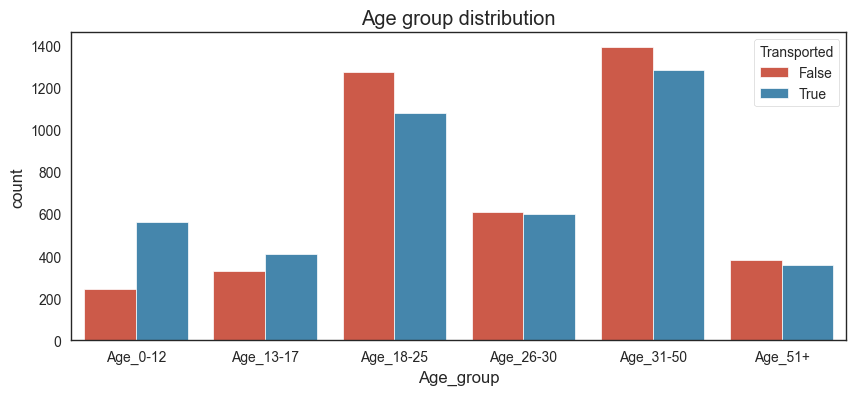

In [9]:
for dataset in data_cleaner:
    dataset['Age_group']=np.nan
    dataset.loc[dataset['Age']<=12, 'Age_group']='Age_0-12'
    dataset.loc[(dataset['Age']>=13) & (dataset['Age']<=17), 'Age_group']='Age_13-17'
    dataset.loc[(dataset['Age']>=18) & (dataset['Age']<=25), 'Age_group']='Age_18-25'
    dataset.loc[(dataset['Age']>=26) & (dataset['Age']<=30), 'Age_group']='Age_26-30'
    dataset.loc[(dataset['Age']>=31) & (dataset['Age']<=50), 'Age_group']='Age_31-50'
    dataset.loc[(dataset['Age']>=51), 'Age_group']='Age_51+'
    
    
plt.figure(figsize=(10,4))
g = sns.countplot(data=data1, x='Age_group', hue='Transported', order=['Age_0-12', 'Age_13-17', 'Age_18-25', 'Age_26-30', 'Age_31-50', 'Age_51+'])
plt.title('Age group distribution')

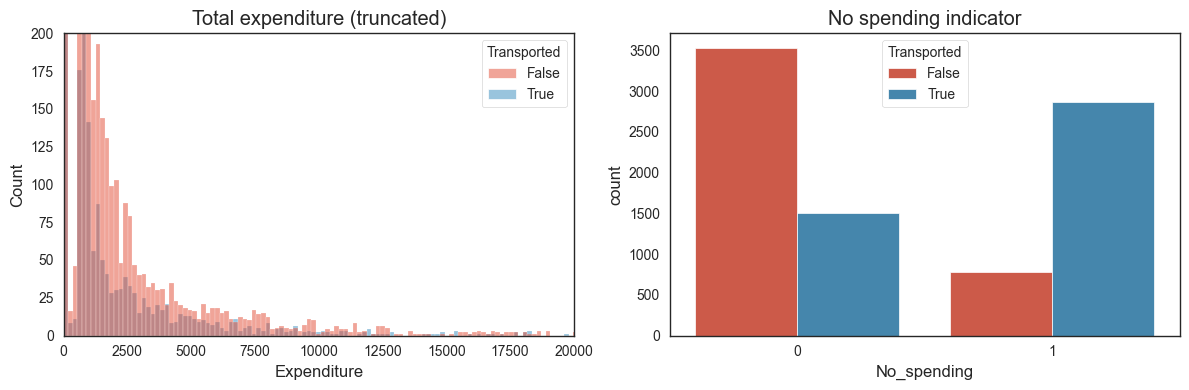

In [10]:
for dataset in data_cleaner:
    dataset['Expenditure']=dataset[num_feats].sum(axis=1)
    dataset['No_spending']=(dataset['Expenditure']==0).astype(int)
    
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.histplot(data=data1, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0, 200])
plt.xlim([0, 20000])

plt.subplot(1, 2, 2)
sns.countplot(data=data1, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

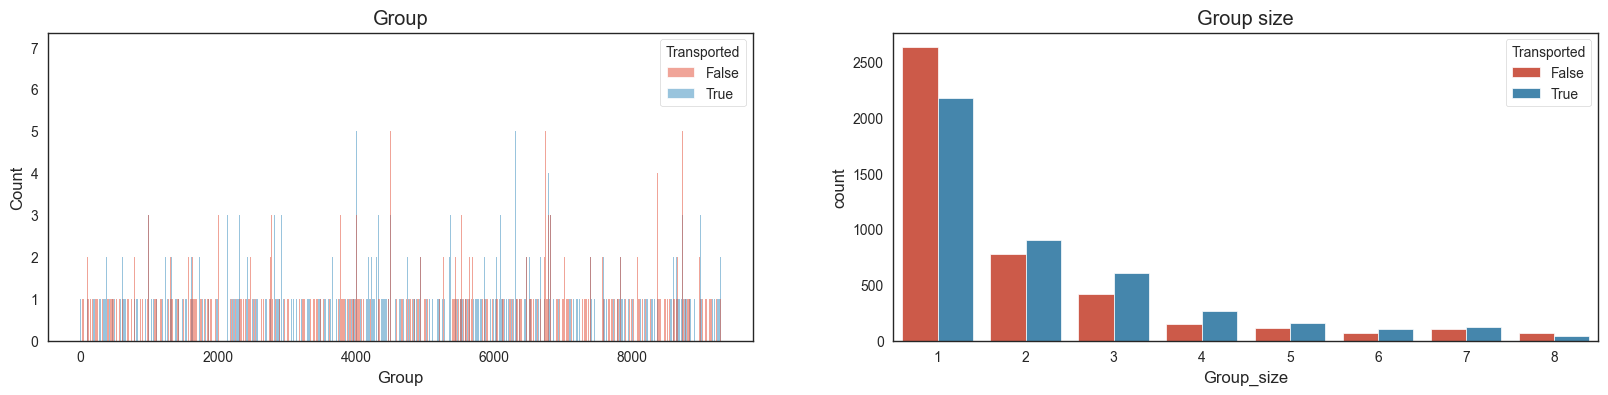

In [11]:
for dataset in data_cleaner:
    dataset['Group'] = dataset['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    dataset['Group_size'] =dataset['Group'].map(lambda x: dataset['Group'].value_counts()[x])

plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
sns.histplot(data=data1, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1, 2, 2)
sns.countplot(data=data1, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

(0.0, 3000.0)

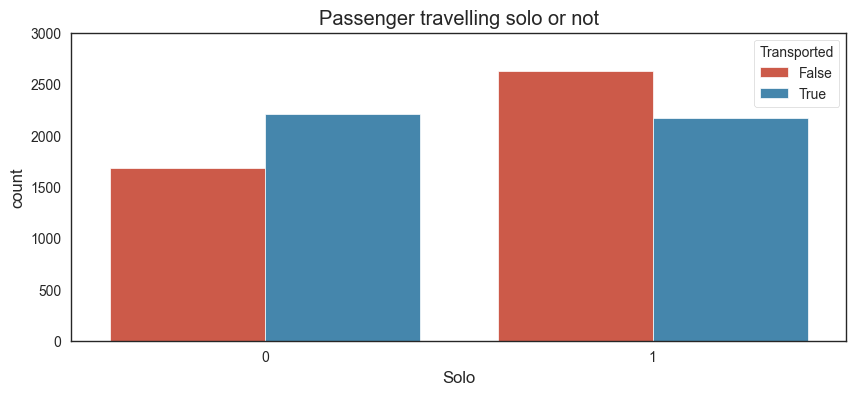

In [12]:
for dataset in data_cleaner:
    dataset['Solo'] =(dataset['Group_size']==1).astype(int)
    
    
plt.figure(figsize=(10,4))
sns.countplot(data=data1, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0, 3000])

# Verifying columns probably will drop from the dataset

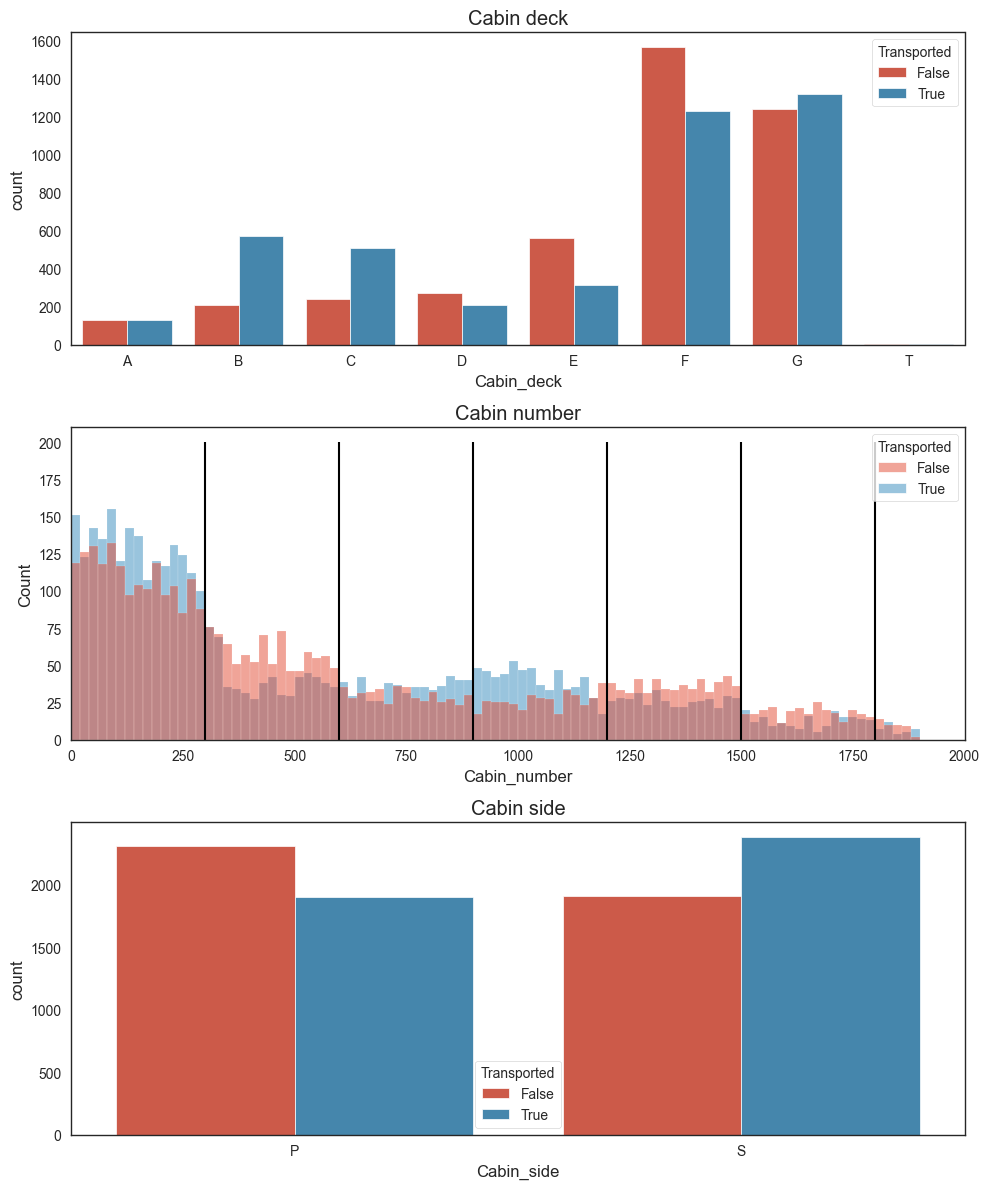

In [13]:
for dataset in data_cleaner:
    # Replace NaN's with outliers for now
    dataset['Cabin'].fillna('Z/9999/Z', inplace = True)
    
    # Split the information in Cabin deck/number/side
    dataset['Cabin_deck'] = dataset['Cabin'].apply(lambda x: x.split('/')[0])
    dataset['Cabin_number'] = dataset['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    dataset['Cabin_side'] = dataset['Cabin'].apply(lambda x: x.split('/')[2])
    
    # Put NaN's back in
    
    dataset.loc[dataset['Cabin_deck'] =='Z', 'Cabin_deck']=np.nan
    dataset.loc[dataset['Cabin_number'] =='9999', 'Cabin_number']=np.nan
    dataset.loc[dataset['Cabin_side'] =='Z', 'Cabin_side']=np.nan
    
    # Drop Cabin
    dataset.drop('Cabin', axis=1, inplace=True)
    
    
    
fig = plt.figure(figsize=(10,12))
plt.subplot(3, 1, 1)
sns.countplot(data=data1, x='Cabin_deck', hue='Transported', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])
plt.title('Cabin deck')

plt.subplot(3, 1, 2)
sns.histplot(data=data1, x='Cabin_number', hue='Transported', binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0, 2000])

plt.subplot(3, 1, 3)
sns.countplot(data=data1, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

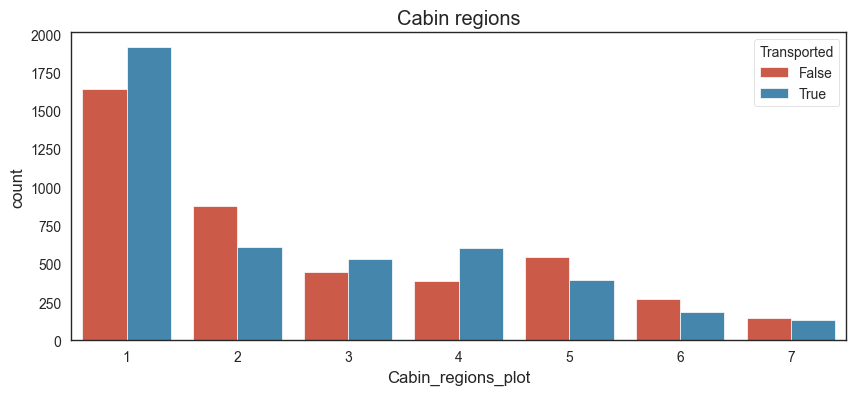

In [14]:
for dataset in data_cleaner:
    # New features - training set
    dataset['Cabin_region1']=(dataset['Cabin_number']<300).astype(int)   # one-hot encoding
    dataset['Cabin_region2']=((dataset['Cabin_number']>=300) & (dataset['Cabin_number']<600)).astype(int)
    dataset['Cabin_region3']=((dataset['Cabin_number']>=600) & (dataset['Cabin_number']<900)).astype(int)
    dataset['Cabin_region4']=((dataset['Cabin_number']>=900) & (dataset['Cabin_number']<1200)).astype(int)
    dataset['Cabin_region5']=((dataset['Cabin_number']>=1200) & (dataset['Cabin_number']<1500)).astype(int)
    dataset['Cabin_region6']=((dataset['Cabin_number']>=1500) & (dataset['Cabin_number']<1800)).astype(int)
    dataset['Cabin_region7']=(dataset['Cabin_number']>=1800).astype(int)

# Plot distribution of new features
plt.figure(figsize=(10,4))
data1['Cabin_regions_plot']=(data1['Cabin_region1']+2*data1['Cabin_region2']+3*data1['Cabin_region3']+4*data1['Cabin_region4']+5*data1['Cabin_region5']+6*data1['Cabin_region6']+7*data1['Cabin_region7']).astype(int)
sns.countplot(data=data1, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
data1.drop('Cabin_regions_plot', axis=1, inplace=True)

Text(0.5, 1.0, 'Family size')

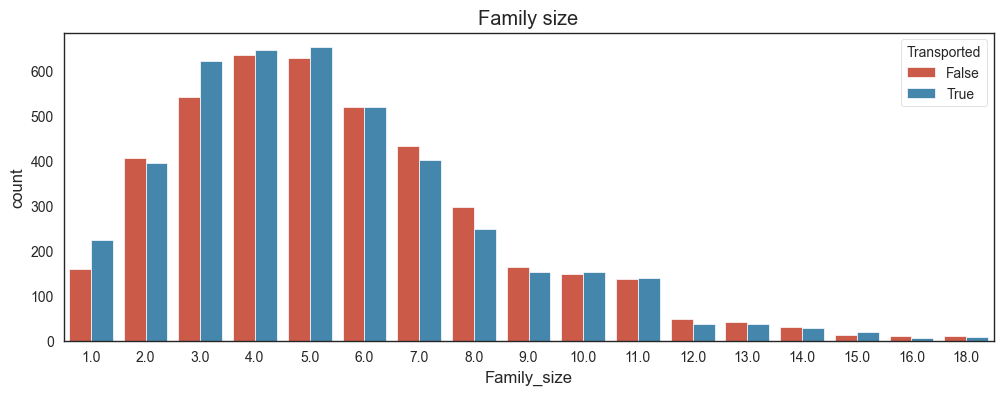

In [15]:
for dataset in data_cleaner:
    # Calculate family size from last name.
    # Replace NaN's with outliers for now (so we can split feature)
    dataset['Name'].fillna('Unknown Unknown', inplace=True)
    # New feature - Surname
    dataset['Surname']=dataset['Name'].str.split().str[-1]
    # New feature - Family size
    dataset['Family_size']=dataset['Surname'].map(lambda x: dataset['Surname'].value_counts()[x])
    # Put Nan's back in (we will fill these later)
    dataset.loc[dataset['Surname']=='Unknown','Surname']=np.nan
    dataset.loc[dataset['Family_size']>100,'Family_size']=np.nan
    # Drop name (we don't need it anymore)
    dataset.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=data1, x='Family_size', hue='Transported')
plt.title('Family size')

# Missing Values

In [16]:
data1['Transported'].astype(int)

for dataset in data_cleaner:
    na_cols = dataset.columns[dataset.isna().any()].tolist()
    mv=pd.DataFrame(dataset[na_cols].isna().sum(), columns=['Number_missing'])
    mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(dataset),2)
    print(mv, '\n')

              Number_missing  Percentage_missing
HomePlanet               201                2.31
CryoSleep                217                2.50
Destination              182                2.09
Age                      179                2.06
VIP                      203                2.34
RoomService              181                2.08
FoodCourt                183                2.11
ShoppingMall             208                2.39
Spa                      183                2.11
VRDeck                   188                2.16
Age_group                179                2.06
Cabin_deck               199                2.29
Cabin_side               199                2.29
Surname                  200                2.30
Family_size              200                2.30 

              Number_missing  Percentage_missing
HomePlanet                87                2.03
CryoSleep                 93                2.17
Destination               92                2.15
Age               

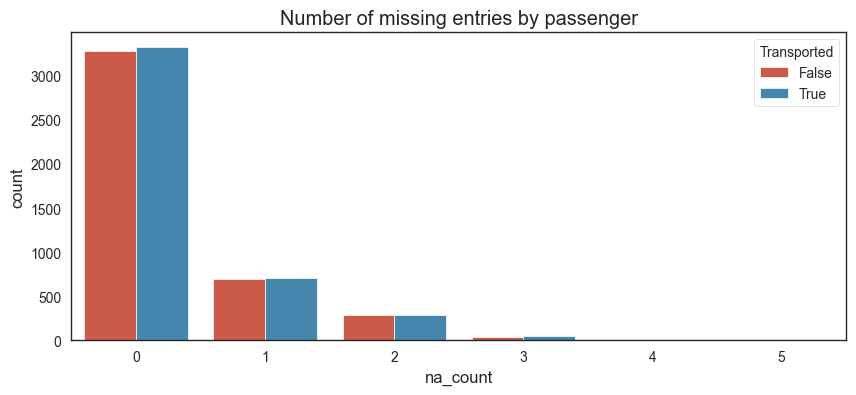

In [17]:
data1['na_count']=data1.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=data1, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
data1.drop('na_count', axis=1,inplace=True)

# Strategy

For this notebook, the strategy to deal with missing values is just use the median for continuous features and the mode for categorical features, this will work 'well enough', but the objective is comparate the accuracy with the other strategy much more complexity done in other notebook.

In [18]:
cat_feats

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [19]:
num_feats

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [20]:
qual_feats

['PassengerId', 'Cabin', 'Name']

# Identify the values most commons

Using only train.csv

In [21]:
string_count_Destination = data1.Destination.value_counts()
max_string_Destination = string_count_Destination.idxmax()
max_string_Destination

'TRAPPIST-1e'

In [22]:
string_count_HomePlanet = data1.HomePlanet.value_counts()
max_string_HomePlanet = string_count_HomePlanet.idxmax()
max_string_HomePlanet

'Earth'

In [23]:
string_count_VIP = data1.VIP.value_counts()
max_string_VIP = string_count_VIP.idxmax()
max_string_VIP

False

In [24]:
string_count_CryoSleep = data1.CryoSleep.value_counts()
max_string_CryoSleep = string_count_CryoSleep.idxmax()
max_string_CryoSleep

False

In [25]:
median_value_Age = data1.Age.median()
median_value_Age

27.0

# Filling NaN values

In [26]:
data1.Destination.fillna(max_string_Destination, inplace=True)
data1.HomePlanet.fillna(max_string_HomePlanet, inplace=True)
data1.VIP.fillna(max_string_VIP, inplace=True)
data1.CryoSleep.fillna(max_string_CryoSleep, inplace=True)
data1.Age.fillna(median_value_Age, inplace=True)


# Converting formats VIP, CryoSleep into DataType
data1.VIP = data1.VIP.astype(int)
data1.CryoSleep = data1.CryoSleep.astype(int)
data1.Transported = data1.Transported.astype(int)

# Veryfying that NaN Values are Removed

In [27]:
print('Train columns with null values:\n',data1.isna().sum())

Train columns with null values:
 PassengerId        0
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Transported        0
Age_group        179
Expenditure        0
No_spending        0
Group              0
Group_size         0
Solo               0
Cabin_deck       199
Cabin_number       0
Cabin_side       199
Cabin_region1      0
Cabin_region2      0
Cabin_region3      0
Cabin_region4      0
Cabin_region5      0
Cabin_region6      0
Cabin_region7      0
Surname          200
Family_size      200
dtype: int64


# Dummy Variable and Standardization columns

Create a DummyVariables for HomePlanet and Destination

and standardization RoomService, FoodCourt, ShoppingMall, VRDeck using StandardScaler Library

# After that dropping columns

PassengerId, Destination, HomePlanet, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Age_group, Expenditure, Cabin_deck, Surname, Family_size

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8693 non-null   object 
 2   CryoSleep      8693 non-null   int32  
 3   Destination    8693 non-null   object 
 4   Age            8693 non-null   float64
 5   VIP            8693 non-null   int32  
 6   RoomService    8512 non-null   float64
 7   FoodCourt      8510 non-null   float64
 8   ShoppingMall   8485 non-null   float64
 9   Spa            8510 non-null   float64
 10  VRDeck         8505 non-null   float64
 11  Transported    8693 non-null   int32  
 12  Age_group      8514 non-null   object 
 13  Expenditure    8693 non-null   float64
 14  No_spending    8693 non-null   int32  
 15  Group          8693 non-null   int32  
 16  Group_size     8693 non-null   int64  
 17  Solo           8693 non-null   int32  
 18  Cabin_de

In [29]:
#data1.drop(['PassengerId', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age_group', 'Expenditure', 'Cabin_deck', 'Surname', 'Family_size'], axis=1,inplace=True)

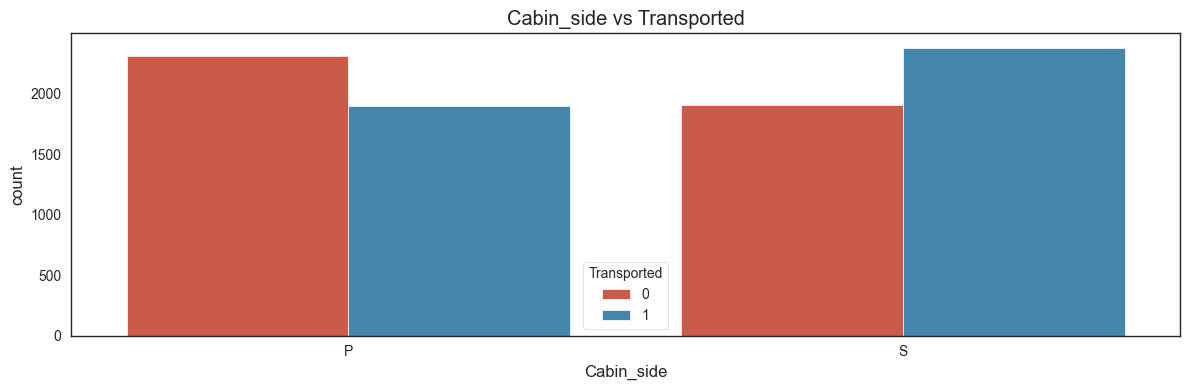

In [30]:
fig = plt.figure(figsize=(12,4))
sns.countplot(data=data1, x='Cabin_side', hue='Transported')
plt.title('Cabin_side vs Transported')
fig.tight_layout()

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8693 non-null   object 
 2   CryoSleep      8693 non-null   int32  
 3   Destination    8693 non-null   object 
 4   Age            8693 non-null   float64
 5   VIP            8693 non-null   int32  
 6   RoomService    8512 non-null   float64
 7   FoodCourt      8510 non-null   float64
 8   ShoppingMall   8485 non-null   float64
 9   Spa            8510 non-null   float64
 10  VRDeck         8505 non-null   float64
 11  Transported    8693 non-null   int32  
 12  Age_group      8514 non-null   object 
 13  Expenditure    8693 non-null   float64
 14  No_spending    8693 non-null   int32  
 15  Group          8693 non-null   int32  
 16  Group_size     8693 non-null   int64  
 17  Solo           8693 non-null   int32  
 18  Cabin_de

In [32]:
dummy_home = pd.get_dummies(data1.HomePlanet, dtype=int)
home_df = pd.DataFrame(dummy_home)
data2 = pd.concat([data1, home_df], axis='columns')

In [33]:
dummy_dest = pd.get_dummies(data2.Destination, dtype=int)
dest_df = pd.DataFrame(dummy_dest)
data3 = pd.concat([data2, dest_df], axis='columns')

# Dropping HomePlanet and Destination

In [34]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8693 non-null   object 
 2   CryoSleep      8693 non-null   int32  
 3   Destination    8693 non-null   object 
 4   Age            8693 non-null   float64
 5   VIP            8693 non-null   int32  
 6   RoomService    8512 non-null   float64
 7   FoodCourt      8510 non-null   float64
 8   ShoppingMall   8485 non-null   float64
 9   Spa            8510 non-null   float64
 10  VRDeck         8505 non-null   float64
 11  Transported    8693 non-null   int32  
 12  Age_group      8514 non-null   object 
 13  Expenditure    8693 non-null   float64
 14  No_spending    8693 non-null   int32  
 15  Group          8693 non-null   int32  
 16  Group_size     8693 non-null   int64  
 17  Solo           8693 non-null   int32  
 18  Cabin_de

In [35]:
data3.drop(['HomePlanet', 'Destination'], axis='columns', inplace=True)

In [36]:
cat_feats

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [37]:
qual_feats

['PassengerId', 'Cabin', 'Name']

In [38]:
num_feats

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [39]:
subset_cols = [num_feats]

In [40]:
subset_df = data3[num_feats]

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(subset_df)

StandardScaler()

In [43]:
scaled_values = scaler.transform(subset_df)

In [44]:
data3[num_feats]=scaled_values

In [45]:
#data3.drop(num_feats, axis='columns', inplace=True)

In [46]:
data3.head(5)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_region6,Cabin_region7,Surname,Family_size,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,0,39.0,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0,...,0,0,Ofracculy,1.0,0,1,0,0,0,1
1,0002_01,0,24.0,0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,1,...,0,0,Vines,4.0,1,0,0,0,0,1
2,0003_01,0,58.0,1,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0,...,0,0,Susent,6.0,0,1,0,0,0,1
3,0003_02,0,33.0,0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0,...,0,0,Susent,6.0,0,1,0,0,0,1
4,0004_01,0,16.0,0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,1,...,0,0,Santantines,6.0,1,0,0,0,0,1


In [49]:
data3.drop(['PassengerId', 'Age_group', 'No_spending', 'Group', 'Cabin_deck', 'Cabin_number' ,'Expenditure', 'Cabin_region1', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Surname', 'Family_size' ], axis='columns', inplace=True)

In [50]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      8693 non-null   int32  
 1   Age            8693 non-null   float64
 2   VIP            8693 non-null   int32  
 3   RoomService    8512 non-null   float64
 4   FoodCourt      8510 non-null   float64
 5   ShoppingMall   8485 non-null   float64
 6   Spa            8510 non-null   float64
 7   VRDeck         8505 non-null   float64
 8   Transported    8693 non-null   int32  
 9   Group_size     8693 non-null   int64  
 10  Solo           8693 non-null   int32  
 11  Cabin_side     8494 non-null   object 
 12  Earth          8693 non-null   int32  
 13  Europa         8693 non-null   int32  
 14  Mars           8693 non-null   int32  
 15  55 Cancri e    8693 non-null   int32  
 16  PSO J318.5-22  8693 non-null   int32  
 17  TRAPPIST-1e    8693 non-null   int32  
dtypes: float

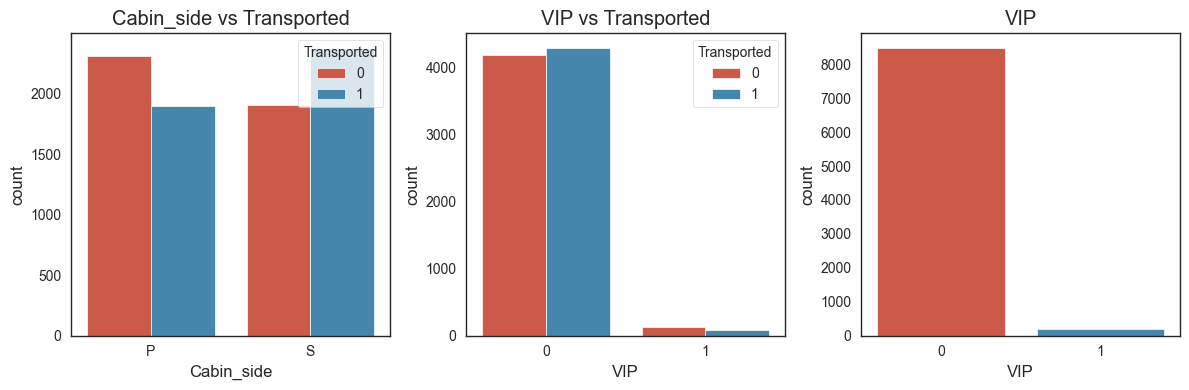

In [51]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
sns.countplot(data=data3, x='Cabin_side', hue='Transported')
plt.title('Cabin_side vs Transported')

plt.subplot(1, 3, 2)
sns.countplot(data=data3, x='VIP', hue='Transported')
plt.title('VIP vs Transported')

plt.subplot(1, 3, 3)
sns.countplot(data=data3, x='VIP')
plt.title('VIP')
fig.tight_layout()

In [53]:
label = LabelEncoder()
data3['Cabin_side_Code'] = label.fit_transform(data3['Cabin_side'])

In [54]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryoSleep        8693 non-null   int32  
 1   Age              8693 non-null   float64
 2   VIP              8693 non-null   int32  
 3   RoomService      8512 non-null   float64
 4   FoodCourt        8510 non-null   float64
 5   ShoppingMall     8485 non-null   float64
 6   Spa              8510 non-null   float64
 7   VRDeck           8505 non-null   float64
 8   Transported      8693 non-null   int32  
 9   Group_size       8693 non-null   int64  
 10  Solo             8693 non-null   int32  
 11  Cabin_side       8494 non-null   object 
 12  Earth            8693 non-null   int32  
 13  Europa           8693 non-null   int32  
 14  Mars             8693 non-null   int32  
 15  55 Cancri e      8693 non-null   int32  
 16  PSO J318.5-22    8693 non-null   int32  
 17  TRAPPIST-1e   

In [55]:
data3.drop(['Cabin_side'], axis='columns', inplace=True)

In [56]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryoSleep        8693 non-null   int32  
 1   Age              8693 non-null   float64
 2   VIP              8693 non-null   int32  
 3   RoomService      8512 non-null   float64
 4   FoodCourt        8510 non-null   float64
 5   ShoppingMall     8485 non-null   float64
 6   Spa              8510 non-null   float64
 7   VRDeck           8505 non-null   float64
 8   Transported      8693 non-null   int32  
 9   Group_size       8693 non-null   int64  
 10  Solo             8693 non-null   int32  
 11  Earth            8693 non-null   int32  
 12  Europa           8693 non-null   int32  
 13  Mars             8693 non-null   int32  
 14  55 Cancri e      8693 non-null   int32  
 15  PSO J318.5-22    8693 non-null   int32  
 16  TRAPPIST-1e      8693 non-null   int32  
 17  Cabin_side_Cod

In [57]:
data3.isna().sum()

CryoSleep            0
Age                  0
VIP                  0
RoomService        181
FoodCourt          183
ShoppingMall       208
Spa                183
VRDeck             188
Transported          0
Group_size           0
Solo                 0
Earth                0
Europa               0
Mars                 0
55 Cancri e          0
PSO J318.5-22        0
TRAPPIST-1e          0
Cabin_side_Code      0
dtype: int64

In [59]:
median_value_RoomService = data3.RoomService.median()
median_value_FoodCourt = data3.FoodCourt.median()
median_value_ShoppingMall = data3.ShoppingMall.median()
median_value_Spa = data3.Spa.median()
median_value_VRDeck = data3.VRDeck.median()

data3.RoomService.fillna(median_value_RoomService, inplace=True)
data3.FoodCourt.fillna(median_value_FoodCourt, inplace=True)
data3.ShoppingMall.fillna(median_value_ShoppingMall, inplace=True)
data3.Spa.fillna(median_value_Spa, inplace=True)
data3.VRDeck.fillna(median_value_VRDeck, inplace=True)


In [60]:
data3.isna().sum()

CryoSleep          0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported        0
Group_size         0
Solo               0
Earth              0
Europa             0
Mars               0
55 Cancri e        0
PSO J318.5-22      0
TRAPPIST-1e        0
Cabin_side_Code    0
dtype: int64

# Model Creation - Dropping the target column

In [102]:
X = data3.drop('Transported', axis='columns')
y = data3['Transported']

# Split the dataset into train and test

Verifying the length in every piece

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

X_train Shape: (5824, 17)
X_test Shape: (2869, 17)
y_train Shape: (5824,)
y_test Shape: (2869,)


#### Importing SVM (Support Vector Machine) and Fitting data with model

In [66]:
svm = SVC()

In [67]:
svm.fit(X_train, y_train)

SVC()

#### Score of the Model

In [68]:
svm.score(X_train, y_train)

0.7821085164835165

#### Predicting Values from our Trained Model

In [69]:
svm.predict(X_test)

array([0, 0, 1, ..., 0, 0, 1])

### Random Forest

In [72]:
rf = RandomForestClassifier()

In [73]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
rf.score(X_test,y_test)

0.7706517950505403

In [75]:
rf.predict(X_test)

array([0, 1, 0, ..., 0, 0, 1])

# Cross Validation

Importing K-Fold Cross Validation and dividing data based on n_splits

In [77]:
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

#### Cross Val Score of Support Vector Machine

In [79]:
cross_val_score(SVC(), X, y).mean()

0.7762588580794884

#### Cross Val Score of Random Forest Classifier

In [80]:
cross_val_score(RandomForestClassifier(), X,y).mean()

0.7761431215511474

# Verifying and preparing the file submit.csv

In [83]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    4277 non-null   object 
 1   HomePlanet     4190 non-null   object 
 2   CryoSleep      4184 non-null   object 
 3   Destination    4185 non-null   object 
 4   Age            4186 non-null   float64
 5   VIP            4184 non-null   object 
 6   RoomService    4195 non-null   float64
 7   FoodCourt      4171 non-null   float64
 8   ShoppingMall   4179 non-null   float64
 9   Spa            4176 non-null   float64
 10  VRDeck         4197 non-null   float64
 11  Age_group      4186 non-null   object 
 12  Expenditure    4277 non-null   float64
 13  No_spending    4277 non-null   int32  
 14  Group          4277 non-null   int32  
 15  Group_size     4277 non-null   int64  
 16  Solo           4277 non-null   int32  
 17  Cabin_deck     4177 non-null   object 
 18  Cabin_nu

In [98]:
data_val['Transported']= data3.Transported.astype(bool)

In [99]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    4277 non-null   object 
 1   HomePlanet     4190 non-null   object 
 2   CryoSleep      4184 non-null   object 
 3   Destination    4185 non-null   object 
 4   Age            4186 non-null   float64
 5   VIP            4184 non-null   object 
 6   RoomService    4195 non-null   float64
 7   FoodCourt      4171 non-null   float64
 8   ShoppingMall   4179 non-null   float64
 9   Spa            4176 non-null   float64
 10  VRDeck         4197 non-null   float64
 11  Age_group      4186 non-null   object 
 12  Expenditure    4277 non-null   float64
 13  No_spending    4277 non-null   int32  
 14  Group          4277 non-null   int32  
 15  Group_size     4277 non-null   int64  
 16  Solo           4277 non-null   int32  
 17  Cabin_deck     4177 non-null   object 
 18  Cabin_nu

# Create and insert the predictions on the file

In [100]:
#submit file
submit = data_val[['PassengerId','Transported']]
submit.to_csv("submission_2.csv", index=False)

print('Validation Data Distribution: \n', data_val['Transported'].value_counts(normalize = True))
submit.sample(10)

Validation Data Distribution: 
 False    0.516717
True     0.483283
Name: Transported, dtype: float64


,PassengerId,Transported
230,0495_01,False
3619,7893_05,False
2447,5335_03,False
1966,4236_02,True
3625,7909_02,True
1756,3721_01,False
2935,6469_01,True
2864,6298_01,True
3186,6974_01,False
3060,6705_01,True


In [101]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB
